In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


####  Dataset Structure and Content
1. The dataset have 18288 records and 3 columns
2. There are no null values in any columns.
3. Datetime column is of type object. So in the next step we will change its datatype


In [5]:
train['Traffic']=train['Count']
train.drop('Count',axis=1,inplace=True)
train.head()

,ID,Datetime,Traffic
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


#### Fetching Year,Month,Days,Hour and DayName from the Date Column

In [6]:
train['Datetime']=pd.to_datetime(train['Datetime'])
train['Year']=train['Datetime'].apply(lambda x:x.year)
train['Month']=train['Datetime'].apply(lambda x:x.month)
train['Day']=train['Datetime'].apply(lambda x:x.day)
train['Hour']=train['Datetime'].apply(lambda x:x.hour)
train['DayName']=train['Datetime'].apply(lambda x:x.strftime("%A"))  #**IMP**

In [7]:
train.head()

,ID,Datetime,Traffic,Year,Month,Day,Hour,DayName
0,0,2012-08-25 00:00:00,8,2012,8,25,0,Saturday
1,1,2012-08-25 01:00:00,2,2012,8,25,1,Saturday
2,2,2012-08-25 02:00:00,6,2012,8,25,2,Saturday
3,3,2012-08-25 03:00:00,2,2012,8,25,3,Saturday
4,4,2012-08-25 04:00:00,2,2012,8,25,4,Saturday


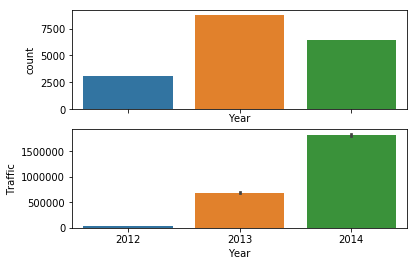

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sns.countplot(x='Year',data=train,ax=ax1)
sns.barplot(x='Year',y='Traffic',data=train,ax=ax2,estimator=sum)
plt.show()

#### Keys Observation
1. We observe the total entries for Year 2012 and 2014 is way less than 2013 indicating we don't have all the dates or less entries for year 2012 and 2014.
2. We can see the Traffic increasing exponentially each Year. Even with less records for year 2014 we have see the traffic is double.

Conclusion:Traffic Increases Each Year

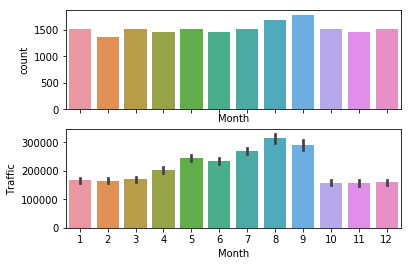

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sns.countplot(x='Month',data=train,ax=ax1)
sns.barplot(x='Month',y='Traffic',data=train,ax=ax2,estimator=sum)
plt.show()

#### Key Observation
1. We see the total entries for each month is almost the same but keep in mind from the previous visualization 2012 and 2014 have less entries indicating that 2012 have records more from later months and 2014 have records more from the earlier months. 

Conclusion: So this is a very misleading visualization

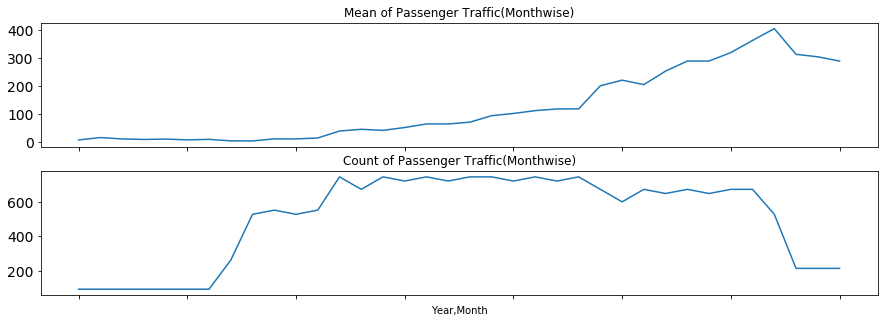

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
temp=train.groupby(['Year', 'Month'])['Traffic'].mean() 
c=train.groupby(['Year', 'Month'])['Traffic'].count() 
temp.plot(figsize=(15,5), title= 'Mean of Passenger Traffic(Monthwise)', fontsize=14,ax=ax1)
c.plot(figsize=(15,5), title= 'Count of Passenger Traffic(Monthwise)', fontsize=14,ax=ax2)

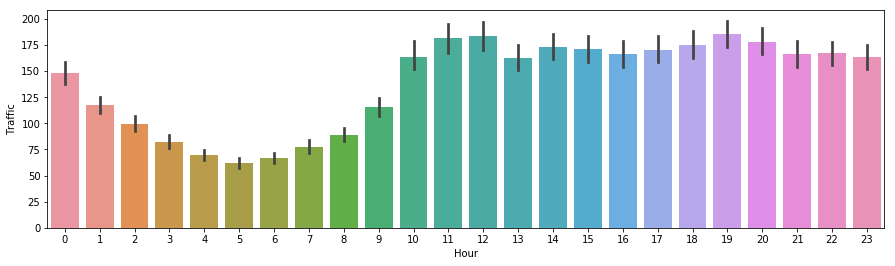

In [11]:
plt.figure(figsize=(15,4))
sns.barplot(x='Hour',y='Traffic',data=train)

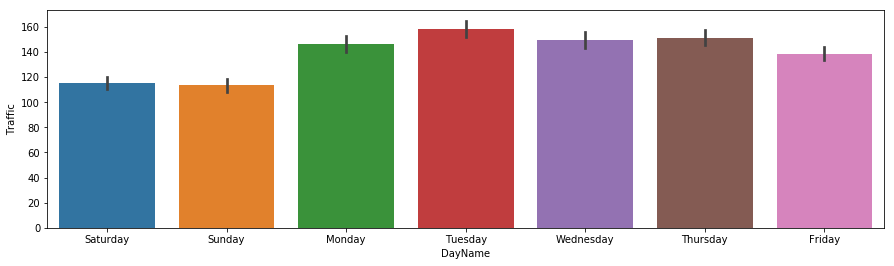

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x='DayName',y='Traffic',data=train)

#### Observations
1. There is a peak from 11am till midnight 
2. There is a less demand during weekends compare to weekdays

#### Lets create a column name weekend  and see its traffic distribution

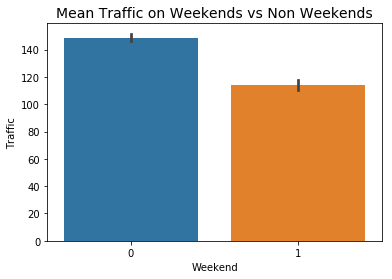

In [13]:
train['Weekend']=train['DayName'].apply(lambda x:1 if (x=='Saturday' or x=='Sunday')  else 0)
sns.barplot(x='Weekend',y='Traffic',data=train)
plt.title('Mean Traffic on Weekends vs Non Weekends',fontsize=14)
plt.show()

In [14]:
train.drop('ID',1,inplace=True)
train.head()

,Datetime,Traffic,Year,Month,Day,Hour,DayName,Weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,Saturday,1
1,2012-08-25 01:00:00,2,2012,8,25,1,Saturday,1
2,2012-08-25 02:00:00,6,2012,8,25,2,Saturday,1
3,2012-08-25 03:00:00,2,2012,8,25,3,Saturday,1
4,2012-08-25 04:00:00,2,2012,8,25,4,Saturday,1


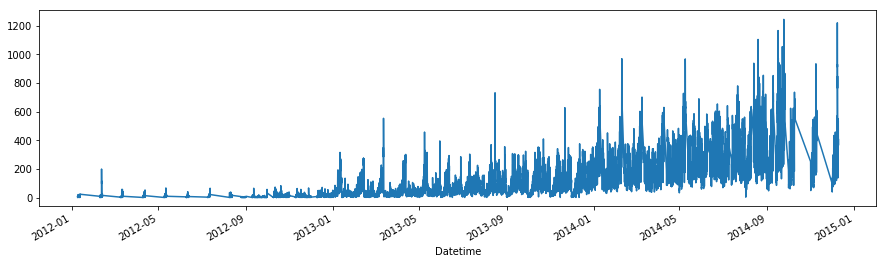

In [15]:
train.set_index('Datetime').Traffic.plot(figsize=(15,4))

#### Why we need to perform Sampling
From the above plot we cannot tell the trend of the Traffic attribute.It is increasing but then also decreasing(may be no value in the dataset or actually decreasing) the very next moment.So to get an idea about the trend and seasonality we will resample the data by performing downsampling. 

In [16]:
                    #Resampling
hourly=train.set_index('Datetime').resample('H').mean()
daily=train.set_index('Datetime').resample('D').mean()
weekly=train.set_index('Datetime').resample('W').mean()
monthly=train.set_index('Datetime').resample('M').mean()

#### Plot the graph after sampling 

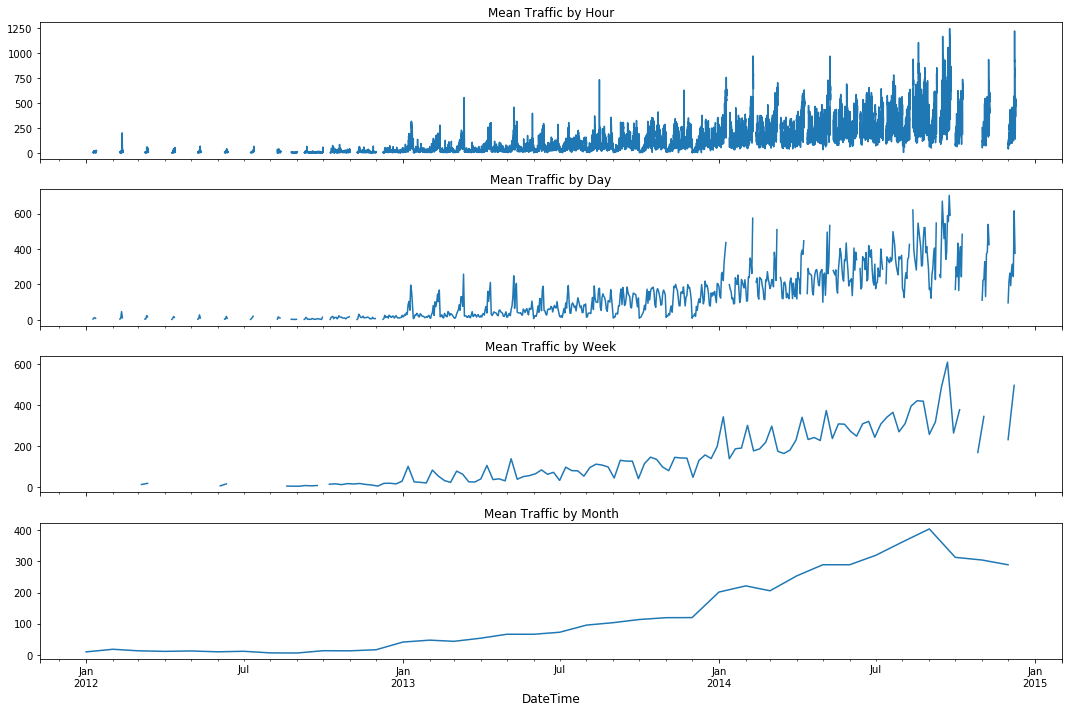

In [17]:
fig,ax=plt.subplots(nrows=4,ncols=1,sharex=True)
hourly.Traffic.plot(figsize=(15,10),title='Mean Traffic by Hour',ax=ax[0])
daily.Traffic.plot(figsize=(15,10),title='Mean Traffic by Day',ax=ax[1])
weekly.Traffic.plot(figsize=(15,10),title='Mean Traffic by Week',ax=ax[2])
monthly.Traffic.plot(figsize=(15,10),title='Mean Traffic by Month',ax=ax[3])
plt.xlabel('DateTime',fontsize=12)
plt.tight_layout()

We observe the visuals are getting more and more stable when we aggregate further and can see an upward trend in the Traffic as well.

#### Splitting the Data into Training and validation dataset.
1. Cannot use the test train split because we want to predict the future. So we will split the data in a way where train data has all records till a certain date and then all the dates after that will be the validation dataset. 
2. And we will see how our model is performing by taking validation dataset into account.

In [18]:
Train=train.set_index('Datetime').loc['2012-08-25':'2014-06-24'] 
valid=train.set_index('Datetime').loc['2014-06-25':'2014-09-25']

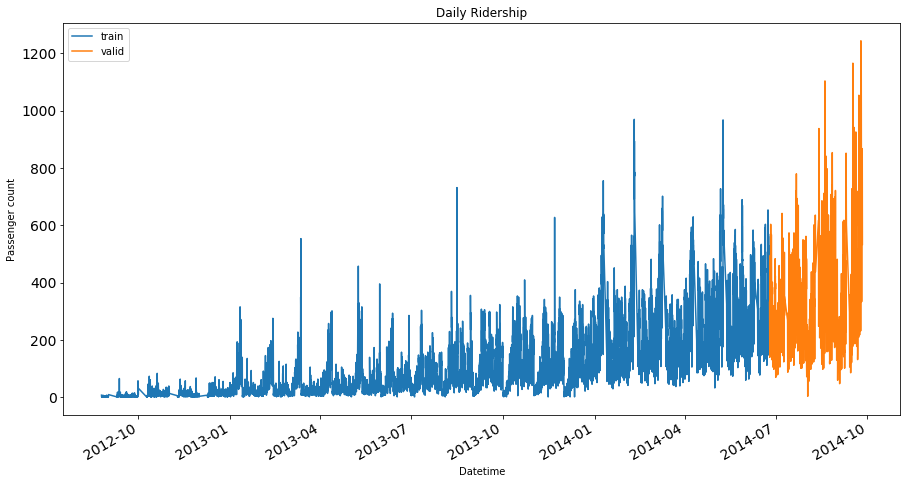

In [19]:
Train.Traffic.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Traffic.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

#### Different Modelling Techniques
1. Naive Method - Assigning the last value of the Training Set 
2. Rolling Mean - Assign the Rolling Mean of n numbers i.e. Mean of last n numbers of Training Set
3. Simple Exponential Smoothing - Assign Weight. More weight to recent observations and less wight to past weight.
4. Holts Linear Trend Model - This technique takes trends and seasonality also into the account and assign weight accordingly.

#### Naive Method 

In [21]:
y=valid.copy()
y['naive']=Train['Traffic'].iloc[-1]
plt.figure(figsize=(15,8))
Train['Traffic'].plot(label='Train')
valid['Traffic'].plot(label='Valid')
y['naive'].plot(label='Naive')
plt.legend(loc='best')
plt.show()
print('The Root Mean Squared Error using Naive Method is:'np.sqrt(mean_squared_error(valid.Traffic,y.naive)))

SyntaxError: invalid syntax (<ipython-input-21-f9cd49bd258f>, line 9)

#### Rolling Mean 

In [ ]:
y=valid.copy()
y['rollingavg']=Train['Traffic'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,8))
Train['Traffic'].plot(label='Train')
valid['Traffic'].plot(label='Valid')
y['rollingavg'].plot(label='MovingAvg')
plt.legend(loc='best')
plt.show()
print('The Root Mean Squared Error using Rolling Mean Method:'np.sqrt(mean_squared_error(valid.Traffic,y.rollingavg)))

#### Simple Exponential Smoothing 

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y= valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Traffic'])).fit(smoothing_level=0.6,optimized=False) 
y['SES'] = fit2.forecast(len(valid))    #Assigning the value that we got too all in the valid datase with a new column.
plt.figure(figsize=(15,8))
Train['Traffic'].plot(label='Train')
valid['Traffic'].plot(label='Valid')
y['SES'].plot(label='SES')
plt.legend(loc='best')
plt.show()
print('The Root Mean Squared Error using Simple Exponential Smoothing is:', np.sqrt(mean_squared_error(valid.Traffic,y.SES)))

#### Holt Method 

In [ ]:
y= valid.copy() 
y['holt']=Holt(np.array(Train.Traffic)).fit(smoothing_level = 1.3).forecast(len(valid))
plt.figure(figsize=(15,8))
Train['Traffic'].plot(label='Train')
valid['Traffic'].plot(label='Valid')
y['holt'].plot(label='holt')
plt.legend(loc='best')
plt.show()
print('The Root Mean Squared Error using Holt Method is:', np.sqrt(mean_squared_error(valid.Traffic,y.holt)))

In [ ]:
fit1=Holt(np.asarray(Train['Traffic'])).fit(smoothing_level = 0.3)
fit1.forecast(1000)

In [ ]:
alpha=[0.1,0.5,0.9,1.3]
beta=[0.001,0.005,0.01,0.05,0.1,0.5]
rmse=[]
for i in alpha:
    for j in beta:
        print(i,j,(np.double(np.sqrt(mean_squared_error(valid.Traffic,
                                               Holt(np.array(Train.Traffic)).fit(smoothing_level = i,smoothing_slope=j).forecast(len(valid))
                                              ))
                           )
                   )
             )


In [ ]:
weekly['Traffic'].plot()
